In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [6]:
DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19


## Question 6

### Reproduce one of the images in Figure 3

### This is Figure 3a

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

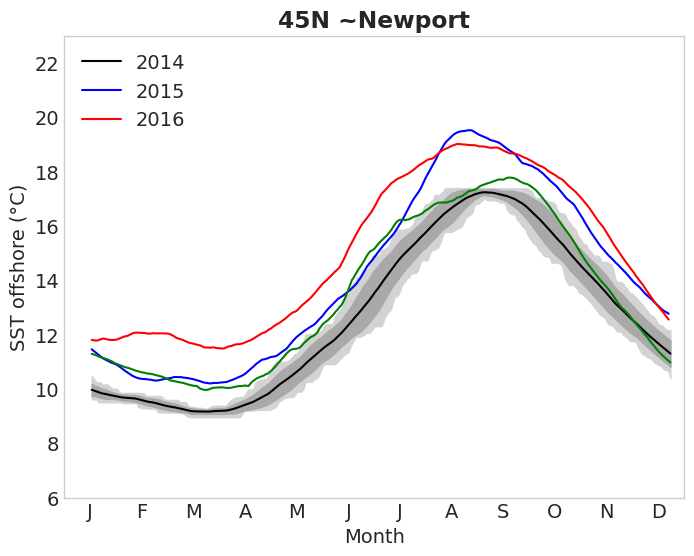

In [10]:
#create a new coordinates called day to represent the ordinal day of the year
ds.coords['day'] = ds.time.dt.dayofyear

#create a new data variable called celsius: change analysed_set(kelvin) to celsius
ds['celsius'] = ds['analysed_sst'] - 273.15

#nearest-neighbor sampling
new_ds = ds.sel(lat = 45, lon = -167.27, method = 'nearest')

fig, ax = plt.subplots()

#mean during 2002–2013 (black line)
mean_black = new_ds.sel(time = slice('2002', '2013')).groupby('day').mean()
mean_black.celsius.rolling(day = 30, center = True).mean().plot(x = 'day', color = 'black')

#maximum and minimum values during 2002–2013
maximum = mean_black.celsius.rolling(day = 30, center = True).max()
minimum = mean_black.celsius.rolling(day = 30, center = True).min()

#compute mean and standard deviation 
mean = mean_black.celsius.rolling(day = 30, center = True).mean()
std = mean_black.celsius.rolling(day = 30, center = True).std()

envelope_of_sd = mean_black.assign({'plus': mean + std, 'minus': mean - std})

#values during 2014 (blue line)
year2014 = new_ds.sel(time = '2014').celsius.rolling(time = 30, center = True).mean().plot(x = 'day', color = 'blue');

#values during 2015 (red line)
year2015 = new_ds.sel(time = '2015').celsius.rolling(time = 30, center = True).mean().plot(x = 'day', color = 'red');

#values during 2016 (green line)
year2016 = new_ds.sel(time = '2016').celsius.rolling(time = 30, center = True).mean().plot(x = 'day', color = 'green');

#change x-axis labels
ax.set_xticks(np.arange(15, 360, 30))
ax.set_xticklabels(['J', 'F', 'M','A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

#plot light grey: the envelope of maximum and minimum values during 2002–2013
plt.fill_between(mean.day.values, maximum, minimum, color = 'lightgray')

#plot dark grey: the envelope of ±1 SD around the mean during 2002–2013
plt.fill_between(mean.day.values, envelope_of_sd.minus, envelope_of_sd.plus, color = 'darkgray')

#setting title bold
plt.title('45N ~Newport', fontweight='bold')

plt.ylabel('SST offshore (°C)')
plt.xlabel('Month')
plt.legend({'2014': 'blue', '2015':'red', '2016':'greem'}, loc = 'upper left')
plt.ylim(6, 23)
plt.xlim(0, 360)
plt.margins(x=0)
plt.grid(b = None);